<a href="https://colab.research.google.com/github/utkarshtambe10/stroke-prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')


#Mounting GDrive

In [2]:
#downloading/importing dataset from google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


#Importing Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io


#Importing Datasets

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Stroke_Dataset/healthcare-dataset-stroke-data.csv")
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Data Preparation

Exploratory Data Analysis

In [5]:
data.shape

(5110, 12)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Handling Missing Values

In [8]:
data['bmi'].value_counts()  #gives value of bmi per record

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [9]:
data['bmi'].describe()  #gives mathematical calculations of specified column

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [10]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [11]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Feature Selection

In [12]:
data.drop('id', axis = 1, inplace = True)  #axis = 1 means column

In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Outlier Removal

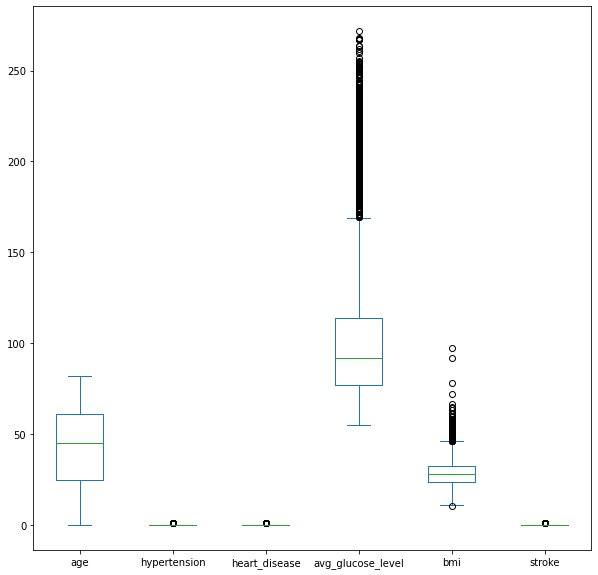

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)
data.plot(kind = 'box')
plt.show()


In [15]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Conclusion is that, many people can happen to have more bmi and avg_glucose_level. So, its better to keep them as it is being the reason to have a stroke

Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()


In [17]:
#data['work_type].unique()

In [18]:
gender = enc.fit_transform(data['gender'])  #male - 1 and female - 0
smoking_status = enc.fit_transform(data['smoking_status'])  #formerly smoked - 1, never smoked - 2 and smokes - 3
work_type = enc.fit_transform(data['work_type'])  #govt_job - 0, children - 1, private - 2 and self employed - 3
Residence_type = enc.fit_transform(data['Residence_type'])  #rural - 0 and urban - 1
ever_married = enc.fit_transform(data['ever_married'])  #yes - 1 and no - 0

In [19]:
#(ever_married)

In [20]:
data['gender'] = gender
data['smoking_status'] = smoking_status
data['work_type'] = work_type
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married

In [21]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB
None


Partioning of Dataset i.e. Splitting of dataset
* 70% for training
* 30% for testing
* X(features) ---train_X, test_X
* Y(target variable - stroke) ---train_Y, test_Y

In [23]:
X = data.drop('stroke', axis = 1)  #all data except 'stroke'
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [24]:
Y = data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [25]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

Normalization

In [27]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [29]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


#Model Training

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [31]:
results = pd.DataFrame(columns = ['DT', 'LR', 'KNN', 'RFC', 'SVC_RBF', 'GNB', 'SGD', 'ADA', 'XGB'], index = range(4))

1. Decision Tree Algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [33]:
dt.fit(X_train_std, Y_train)  #no need of giving, X_train_std as input because it is not calculating distance

DecisionTreeClassifier()

In [34]:
dt.feature_importances_

array([0.02425678, 0.20288006, 0.02897482, 0.0084503 , 0.01581016,
       0.03055151, 0.03256139, 0.36340252, 0.21677685, 0.0763356 ])

In [35]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [36]:
Y_pred = dt.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
Y_prob = dt.predict_proba(X_test_std)[:,1]
Y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
Y_test

2918    0
3056    0
4916    0
4003    0
3332    0
       ..
3238    0
3716    0
3862    0
3941    0
4630    0
Name: stroke, Length: 1533, dtype: int64

In [39]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2918,0,63.0,0,1,1,3,0,239.95,32.2,3
3056,1,62.0,0,1,1,0,0,73.70,26.2,2
4916,1,54.0,0,0,1,0,1,72.96,37.7,3
4003,0,24.0,0,0,0,2,0,147.74,21.4,0
3332,1,27.0,0,0,1,2,1,114.32,28.1,0
...,...,...,...,...,...,...,...,...,...,...
3238,0,57.0,0,0,1,0,0,176.78,50.4,2
3716,0,69.0,0,0,0,2,1,59.31,31.4,3
3862,0,54.0,0,0,1,2,0,68.60,44.8,3
3941,0,32.0,0,0,1,2,0,67.10,27.1,0


In [40]:
acc_dt = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_dt * 100}%")

the accuracy is: 90.99804305283757%


In [41]:
results.iloc[0, 0] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 0] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 0] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(Y_test, Y_prob), 3)
dt_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1464
           1       0.12      0.16      0.14        69

    accuracy                           0.91      1533
   macro avg       0.54      0.55      0.55      1533
weighted avg       0.92      0.91      0.92      1533



In [42]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

ROC AUC score: 0.552
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.903
precision: 0.89
recall: 0.92
f1: 0.91


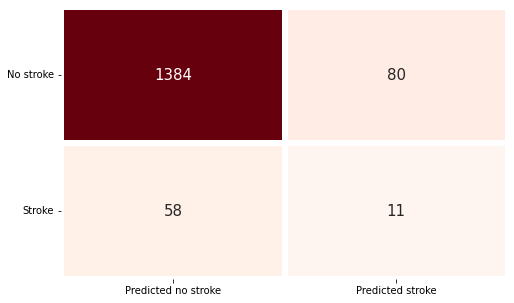

In [43]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(dt_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

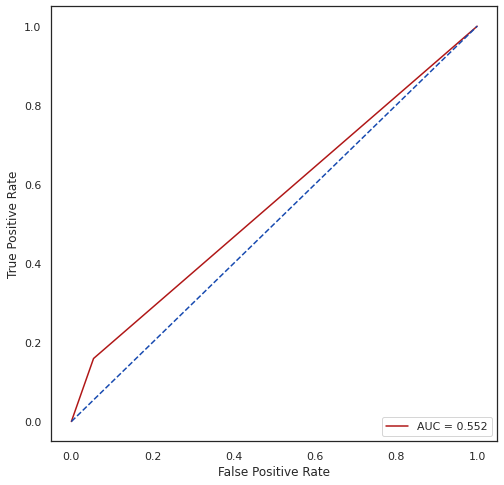

In [44]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
# Feature importance
f_imp = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp.index)):
    f_imp.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp['importance'] = dt.feature_importances_
f_imp2 = f_imp.sort_values('importance', ascending = False)
f_imp2[0:9].style.background_gradient(cmap = 'Blues')


,feature,importance
7,avg_glucose_level,0.363403
8,bmi,0.216777
1,age,0.202880
9,smoking_status,0.076336
6,Residence_type,0.032561
5,work_type,0.030552
2,hypertension,0.028975
0,gender,0.024257
4,ever_married,0.015810


2. Logistic Regression Algorithm

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
lr.fit(X_train_std, Y_train)

LogisticRegression()

In [48]:
Y_pred = lr.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
Y_prob = lr.predict_proba(X_test_std)[:,1]
Y_prob

array([0.10059867, 0.07399695, 0.05040455, ..., 0.03620177, 0.00591958,
       0.00760854])

In [50]:
Y_test

2918    0
3056    0
4916    0
4003    0
3332    0
       ..
3238    0
3716    0
3862    0
3941    0
4630    0
Name: stroke, Length: 1533, dtype: int64

In [51]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2918,0,63.0,0,1,1,3,0,239.95,32.2,3
3056,1,62.0,0,1,1,0,0,73.70,26.2,2
4916,1,54.0,0,0,1,0,1,72.96,37.7,3
4003,0,24.0,0,0,0,2,0,147.74,21.4,0
3332,1,27.0,0,0,1,2,1,114.32,28.1,0
...,...,...,...,...,...,...,...,...,...,...
3238,0,57.0,0,0,1,0,0,176.78,50.4,2
3716,0,69.0,0,0,0,2,1,59.31,31.4,3
3862,0,54.0,0,0,1,2,0,68.60,44.8,3
3941,0,32.0,0,0,1,2,0,67.10,27.1,0


In [52]:
acc_lr = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_lr * 100}%")

the accuracy is: 95.49902152641879%


In [53]:
results.iloc[0, 1] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 1] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 1] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(Y_test, Y_prob), 3)
lr_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [54]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lr, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lr, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lr, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lr, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.847
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.889
precision: 0.79
recall: 0.82
f1: 0.8


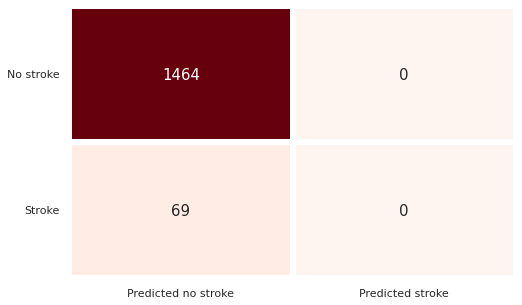

In [55]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lr_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

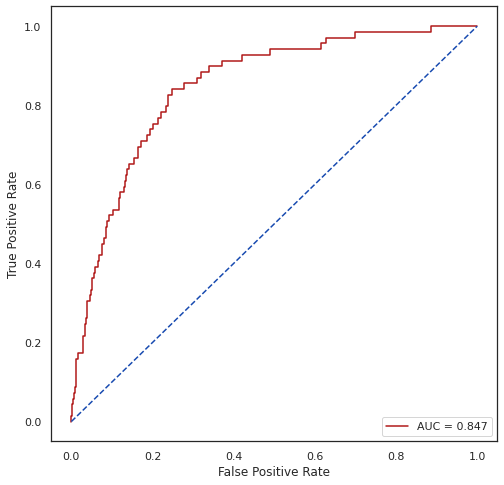

In [56]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [57]:
# Feature importance
f_imp1 = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(10))
for i in range(len(f_imp1.index)):
    f_imp1.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp1['importance (abs coef)'] = abs(lr.coef_)[0]
f_imp1 = f_imp1.sort_values('importance (abs coef)', ascending = False)
f_imp1[0:9].style.background_gradient(cmap = 'Blues')

,feature,importance (abs coef)
1,age,1.619413
7,avg_glucose_level,0.133442
5,work_type,0.089969
6,Residence_type,0.079820
8,bmi,0.076579
2,hypertension,0.075887
4,ever_married,0.060480
0,gender,0.038043
3,heart_disease,0.030607


3. K-Nearest Neighbour Algorithm

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [59]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [60]:
Y_pred = knn.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
Y_prob = knn.predict_proba(X_test_std)[:,1]
Y_prob

array([0.2, 0. , 0. , ..., 0. , 0. , 0. ])

In [62]:
acc_knn = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_knn * 100}%")

the accuracy is: 95.49902152641879%


In [63]:
results.iloc[0, 2] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 2] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 2] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(Y_test, Y_prob), 3)
knn_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1464
           1       0.50      0.01      0.03        69

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.94      0.95      0.93      1533



In [64]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(knn, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.642
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.947
precision: 0.83
recall: 0.98
f1: 0.9


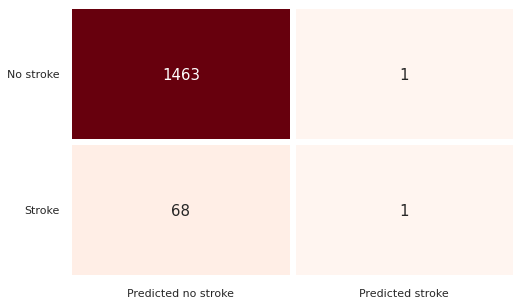

In [65]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(knn_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

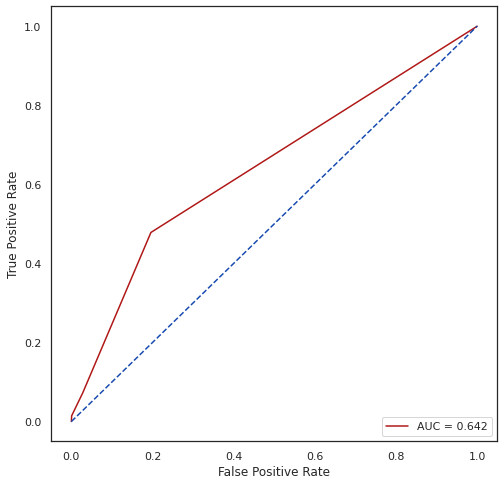

In [66]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

4. Random Forest Classifier Algorithm

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [68]:
rfc.fit(X_train_std, Y_train)

RandomForestClassifier()

In [69]:
Y_pred = rfc.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
Y_prob = rfc.predict_proba(X_test_std)[:,1]
Y_prob

array([0.17, 0.08, 0.13, ..., 0.02, 0.  , 0.01])

In [71]:
acc_rfc = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_rfc * 100}%")

the accuracy is: 95.368558382257%


In [72]:
results.iloc[0, 3] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 3] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 3] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(Y_test, Y_prob), 3)
rfc_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [73]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rfc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rfc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rfc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rfc, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

ROC AUC score: 0.821
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.988
precision: 0.93
recall: 0.96
f1: 0.94


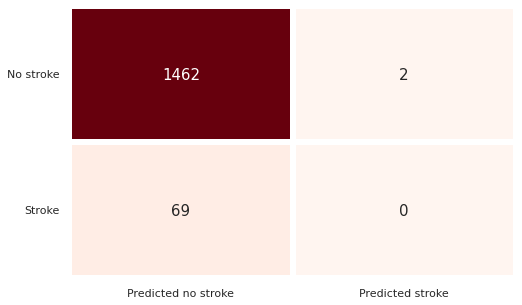

In [74]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rfc_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

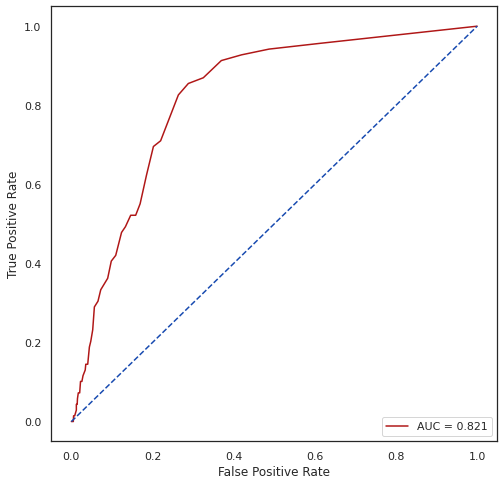

In [75]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] = rfc.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:9].style.background_gradient(cmap = 'Blues')

,feature,importance
7,avg_glucose_level,0.280590
8,bmi,0.241448
1,age,0.235429
9,smoking_status,0.070225
5,work_type,0.046699
0,gender,0.032447
6,Residence_type,0.030840
2,hypertension,0.024770
3,heart_disease,0.019843


5. Support Vector Machine(SVM) Algorithm with 'RBF' Kernel

In [77]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', probability = True)

In [78]:
svc_rbf.fit(X_train_std, Y_train)

SVC(probability=True)

In [79]:
Y_pred = svc_rbf.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
Y_prob = svc_rbf.predict_proba(X_test_std)[:,1]
Y_prob

array([0.05548692, 0.05206832, 0.05368488, ..., 0.05312639, 0.05362016,
       0.05300347])

In [81]:
acc_svc_rbf = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_svc_rbf * 100}%")

the accuracy is: 95.49902152641879%


In [82]:
results.iloc[0, 4] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 4] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 4] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 4] = round(roc_auc_score(Y_test, Y_prob), 3)
svc_rbf_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [83]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(svc_rbf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(svc_rbf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(svc_rbf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(svc_rbf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.58
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.85
precision: 0.73
recall: 0.85
f1: 0.79


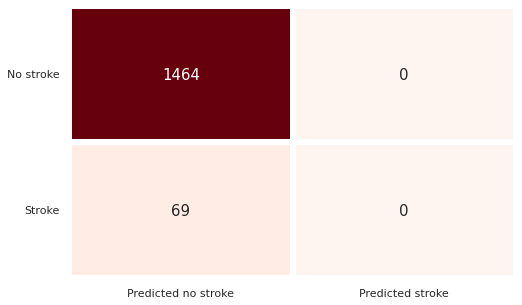

In [84]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(svc_rbf_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

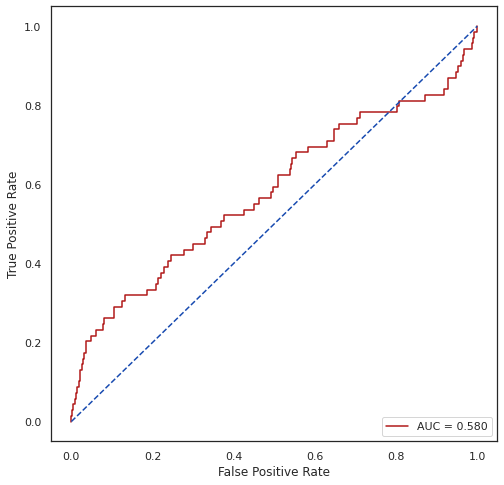

In [85]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

6. Gaussian Naive-Bayes Algorithm

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [87]:
gnb.fit(X_train_std, Y_train)

GaussianNB()

In [88]:
Y_pred = gnb.predict(X_test_std)
Y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [89]:
Y_prob = gnb.predict_proba(X_test_std)[:,1]
Y_prob

array([9.99714226e-01, 9.87012767e-01, 2.47716255e-02, ...,
       1.72839380e-02, 5.82099370e-04, 9.16661565e-04])

In [90]:
acc_gnb = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_gnb * 100}%")

the accuracy is: 86.49706457925636%


In [91]:
results.iloc[0, 5] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 5] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 5] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 5] = round(roc_auc_score(Y_test, Y_prob), 3)
gnb_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1464
           1       0.18      0.55      0.27        69

    accuracy                           0.86      1533
   macro avg       0.58      0.72      0.60      1533
weighted avg       0.94      0.86      0.90      1533



In [92]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(gnb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(gnb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(gnb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(gnb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.836
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.871
precision: 0.76
recall: 0.87
f1: 0.81


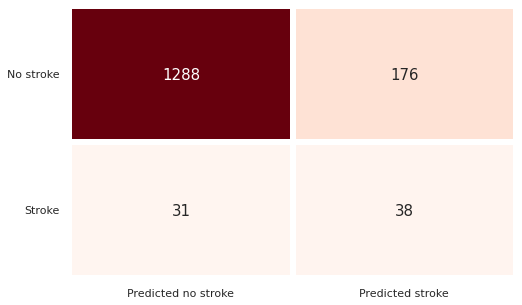

In [93]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(gnb_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()


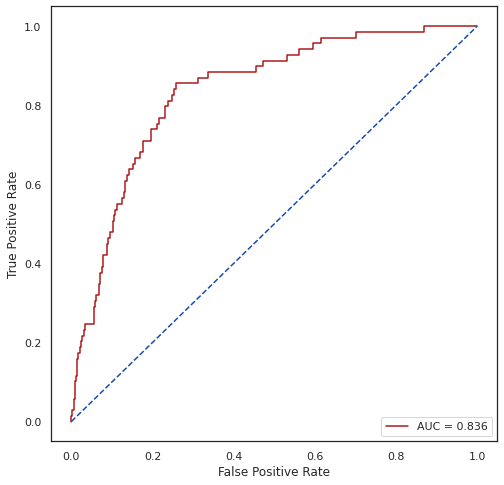

In [94]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

7. Stochastic Gradient Descent(SGD) Classifier Algorithm

In [95]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss = 'hinge')

In [96]:
sgd_model.fit(X_train_std, Y_train)

SGDClassifier()

In [97]:
from sklearn.calibration import CalibratedClassifierCV
calibrator = CalibratedClassifierCV(sgd_model, cv = 'prefit')
sgd = calibrator.fit(X_train_std, Y_train)

In [98]:
Y_pred = sgd.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
Y_prob = sgd.predict_proba(X_test_std)[:,1]
Y_prob

array([0.02784866, 0.0541529 , 0.04673624, ..., 0.04124312, 0.03604345,
       0.03541634])

In [100]:
acc_sgd_model = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_sgd_model * 100}%")

the accuracy is: 95.49902152641879%


In [101]:
results.iloc[0, 6] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 6] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 6] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 6] = round(roc_auc_score(Y_test, Y_prob), 3)
sgd_model_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [102]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(sgd_model, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(sgd_model, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(sgd_model, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(sgd_model, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.722
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.871
precision: 0.79
recall: 0.82
f1: 0.65


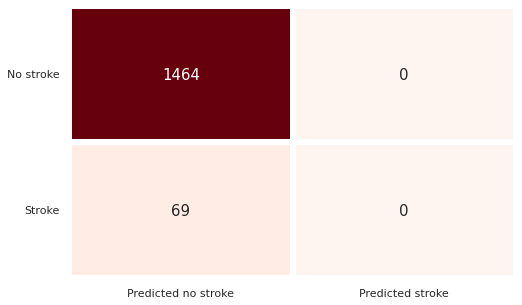

In [103]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(sgd_model_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

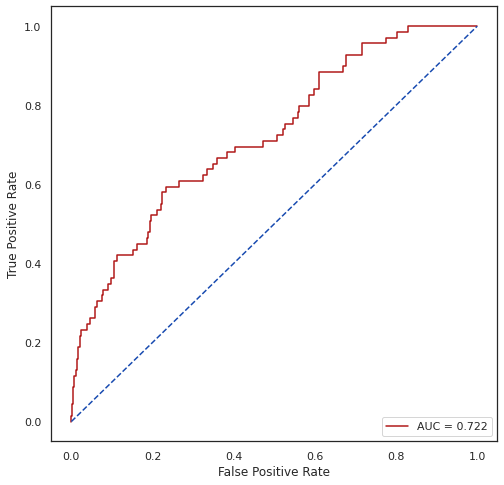

In [104]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(10))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp3['importance (abs coef)'] = abs(sgd_model.coef_)[0]
f_imp3 = f_imp3.sort_values('importance (abs coef)', ascending = False)
f_imp3[0:9].style.background_gradient(cmap = 'Blues')

,feature,importance (abs coef)
2,hypertension,0.346529
1,age,0.246379
7,avg_glucose_level,0.097519
8,bmi,0.045977
0,gender,0.043331
6,Residence_type,0.026675
3,heart_disease,0.021190
5,work_type,0.018519
4,ever_married,0.010851


8. AdaBoost Classifier Algorithm

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [107]:
ada.fit(X_train_std, Y_train)

AdaBoostClassifier()

In [108]:
Y_pred = ada.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
Y_prob = ada.predict_proba(X_test_std)[:,1]
Y_prob

array([0.48514683, 0.48280567, 0.48732079, ..., 0.48732079, 0.442616  ,
       0.442616  ])

In [110]:
acc_ada = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_ada * 100}%")

the accuracy is: 95.10763209393346%


In [111]:
results.iloc[0, 7] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 7] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 7] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 7] = round(roc_auc_score(Y_test, Y_prob), 3)
ada_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.97      1464
           1       0.12      0.01      0.03        69

    accuracy                           0.95      1533
   macro avg       0.54      0.50      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [112]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(ada, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(ada, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(ada, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(ada, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.837
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.926
precision: 0.83
recall: 0.87
f1: 0.85


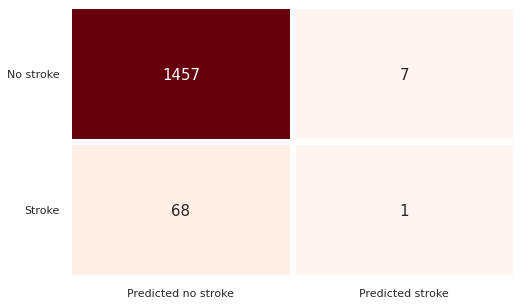

In [113]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(ada_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

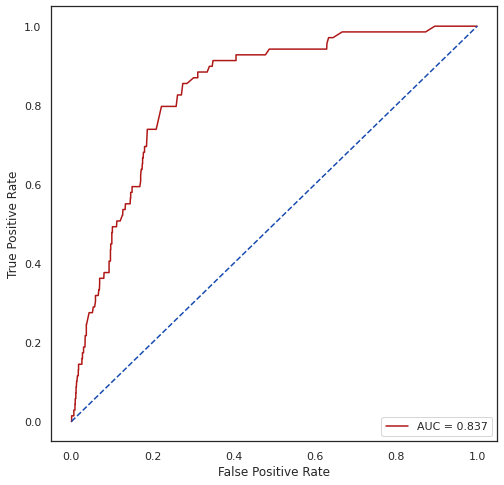

In [114]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
# Feature importance
f_imp4 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp4.index)):
    f_imp4.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp4['importance'] = ada.feature_importances_
f_imp4 = f_imp4.sort_values('importance', ascending = False)
f_imp4[0:9].style.background_gradient(cmap = 'Blues')

,feature,importance
1,age,0.380000
8,bmi,0.360000
7,avg_glucose_level,0.200000
2,hypertension,0.020000
5,work_type,0.020000
9,smoking_status,0.020000
0,gender,0.000000
3,heart_disease,0.000000
4,ever_married,0.000000


9. XGBoost Classifier Algorithm


In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [117]:
xgb.fit(X_train_std, Y_train)

XGBClassifier()

In [118]:
Y_pred = xgb.predict(X_test_std)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
Y_prob = xgb.predict_proba(X_test_std)[:,1]
Y_prob

array([0.13137202, 0.05694525, 0.05073785, ..., 0.04890248, 0.00208961,
       0.00115566], dtype=float32)

In [120]:
acc_xgb = accuracy_score(Y_test, Y_pred)
result = print(f"the accuracy is: {acc_xgb * 100}%")

the accuracy is: 95.49902152641879%


In [121]:
results.iloc[0, 8] = round(precision_score(Y_test, Y_pred), 2)
results.iloc[1, 8] = round(recall_score(Y_test, Y_pred), 2)
results.iloc[2, 8] = round(f1_score(Y_test, Y_pred), 2)
results.iloc[3, 8] = round(roc_auc_score(Y_test, Y_prob), 3)
xgb_cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [122]:
print(f'ROC AUC score: {round(roc_auc_score(Y_test, Y_prob), 3)}')
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")


ROC AUC score: 0.863
-----------------------------------------------------
Cross-validation scores with 5 folds:

ROC AUC: 0.948
precision: 0.84
recall: 0.92
f1: 0.88


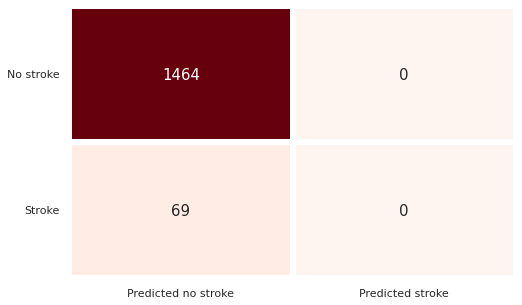

In [123]:
# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)

plt.show()

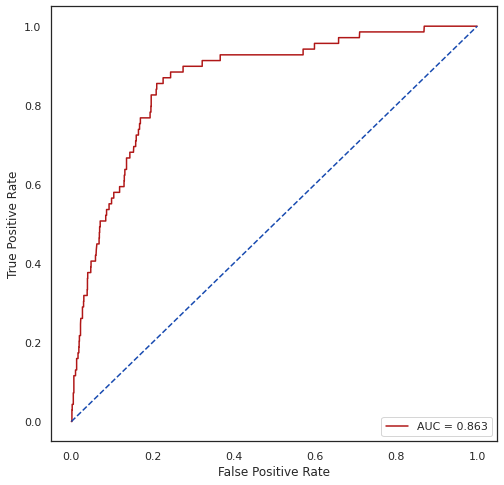

In [124]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [125]:
# Feature importance
f_imp5 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp5.index)):
    f_imp5.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp5['importance'] = xgb.feature_importances_
f_imp5 = f_imp5.sort_values('importance', ascending = False)
f_imp5[0:9].style.background_gradient(cmap = 'Blues')


,feature,importance
1,age,0.242825
3,heart_disease,0.179855
2,hypertension,0.117398
7,avg_glucose_level,0.076611
0,gender,0.071928
9,smoking_status,0.069040
8,bmi,0.062823
6,Residence_type,0.062390
4,ever_married,0.059035


#Inference

In [126]:
#Accuracy Score
res = pd.DataFrame([["Decision Tree", acc_dt], ["Logistic Regression", acc_lr], [" K-Nearest Neighbour",acc_knn], ["Random Forest", acc_rfc], ["Support Vector Machine(SVM)", acc_svc_rbf], ["Gaussian Naive-Bayes", acc_gnb], ["Stochastic Gradient Descent(SGD)", acc_sgd_model], ["AdaBoost Classifier", acc_ada], ["XGBoost Classifier", acc_xgb]],
                       columns = ["Models", "Accuracy Score"]).sort_values(by = 'Accuracy Score', ascending = False)

res.style.background_gradient(cmap = 'Blues')


,Models,Accuracy Score
1,Logistic Regression,0.954990
2,K-Nearest Neighbour,0.954990
4,Support Vector Machine(SVM),0.954990
6,Stochastic Gradient Descent(SGD),0.954990
8,XGBoost Classifier,0.954990
3,Random Forest,0.953686
7,AdaBoost Classifier,0.951076
0,Decision Tree,0.909980
5,Gaussian Naive-Bayes,0.864971


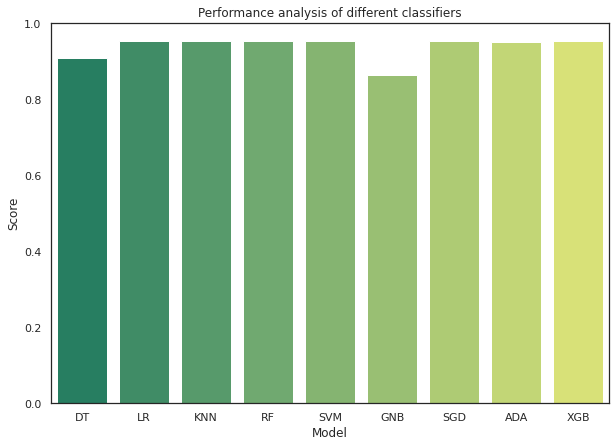

In [127]:
#Accuracy Plotting
Performance = pd.DataFrame(
    data = {
        'Model': ['DT', 'LR', 'KNN','RF', 'SVM', 'GNB', 'SGD', 'ADA', 'XGB'], 
        'Score': [acc_dt, acc_lr, acc_knn, acc_rfc, acc_svc_rbf, acc_gnb, acc_sgd_model, acc_ada, acc_xgb]
    }
)

plt.figure(figsize=(10, 7))
sns.barplot(x="Model", y="Score", data= Performance, palette="summer")
plt.title('Performance analysis of different classifiers')
plt.show()


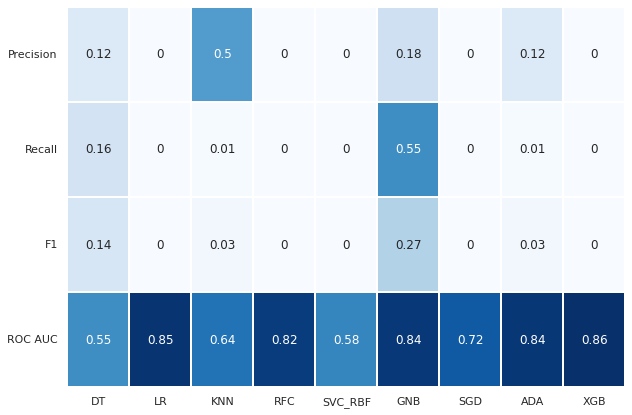

In [128]:
plt.figure(figsize = (10, 7))
sns.heatmap(results[results.columns.to_list()].astype(float), cmap = 'Blues', annot = True, linewidths = 1, cbar = False, annot_kws = {'fontsize': 12},
           yticklabels = ['Precision', 'Recall', 'F1', 'ROC AUC'])
sns.set(font_scale = 1.5)
plt.yticks(rotation = 0)
plt.show()

#Saving the best Model

In [130]:
import pickle
model = r"/content/drive/MyDrive/Stroke_Dataset/bestmodel.sav"
pickle.dump(xgb, open(model, 'wb'))
